# Acerca del conjunto de datos
Conjunto de datos sobre resultados de salud respiratoria y calidad del aire a nivel mundial
Este conjunto de datos proporciona una visión completa de las métricas diarias de la calidad del aire en varias ciudades y los ingresos hospitalarios por enfermedades respiratorias correspondientes. Diseñado para aplicaciones de modelado ambiental, análisis de salud pública y aprendizaje automático, permite una exploración robusta de la relación entre la contaminación atmosférica urbana y los resultados de salud.

# Descripción general del conjunto de datos


*   Ciudades cubiertas: Delhi, Beijing, Ciudad de México, Los Ángeles, Londres, Tokio, El Cairo, São Paulo
*  Métricas incluidas: AQI, PM2.5, PM10, NO₂, O₃, temperatura, humedad, densidad de población, capacidad hospitalaria e ingresos hospitalarios diarios por problemas respiratorios.

**Importaciones**

In [50]:
# 📦 Librerías estándar
import os

# 📊 Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# 🧪 Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
    auc,
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_curve,
    RocCurveDisplay,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# 💾 Guardado de modelos
import joblib



# 📐 Numpy y Pandas
import numpy as np
import pandas as pd

**EDA**

In [51]:
path = 'C:\\Users\\gvald\\Desktop\\Proyecto2\\datasets\\dataset1.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 88489 non-null  object 
 1   date                 88489 non-null  object 
 2   aqi                  88489 non-null  int64  
 3   pm2_5                88489 non-null  float64
 4   pm10                 88489 non-null  float64
 5   no2                  88489 non-null  float64
 6   o3                   88489 non-null  float64
 7   temperature          88489 non-null  float64
 8   humidity             88489 non-null  int64  
 9   hospital_admissions  88489 non-null  int64  
 10  population_density   88489 non-null  object 
 11  hospital_capacity    88489 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 8.1+ MB


In [52]:
df.tail()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
88484,Tokyo,2262-04-06,22,23.4,53.4,24.3,58.9,9.1,55,5,Suburban,419
88485,Delhi,2262-04-07,170,48.0,32.4,25.0,15.7,5.6,40,10,Urban,695
88486,Delhi,2262-04-08,307,46.7,21.8,31.9,45.1,9.5,44,12,Urban,245
88487,Beijing,2262-04-09,65,31.9,26.0,38.1,53.0,17.8,46,11,Suburban,1291
88488,Mexico City,2262-04-10,59,41.8,50.1,31.2,52.0,25.0,65,8,Urban,983


In [53]:
df['date'] = pd.to_datetime(df['date'])

In [54]:
df.describe()

,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,hospital_capacity
count,88489,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000
mean,2141-02-19 00:00:00,249.370182,35.144951,50.118654,30.006211,39.978895,17.522962,56.950966,8.049385,1024.463165
min,2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,20.000000,0.000000,50.000000
25%,2080-07-26 00:00:00,124.000000,24.900000,36.600000,23.300000,31.900000,6.400000,38.000000,6.000000,539.000000
50%,2141-02-19 00:00:00,249.000000,35.100000,50.000000,30.000000,40.000000,17.500000,57.000000,8.000000,1026.000000
75%,2201-09-15 00:00:00,374.000000,45.200000,63.500000,36.700000,48.100000,28.700000,76.000000,10.000000,1511.000000
max,2262-04-10 00:00:00,499.000000,109.900000,143.500000,71.400000,93.500000,40.000000,94.000000,25.000000,1999.000000
std,NaN,144.479132,14.767994,19.796392,9.963139,12.007258,12.961024,21.629675,3.715458,561.978071


In [55]:
df.isna().sum() 

city                   0
date                   0
aqi                    0
pm2_5                  0
pm10                   0
no2                    0
o3                     0
temperature            0
humidity               0
hospital_admissions    0
population_density     0
hospital_capacity      0
dtype: int64

In [56]:
(df == '?').sum()

city                   0
date                   0
aqi                    0
pm2_5                  0
pm10                   0
no2                    0
o3                     0
temperature            0
humidity               0
hospital_admissions    0
population_density     0
hospital_capacity      0
dtype: int64

In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df["city"].value_counts()

city
Delhi          26465
Beijing        22064
Mexico City    13377
Los Angeles     9003
London          6985
Tokyo           6147
Cairo           2700
São Paulo       1748
Name: count, dtype: int64

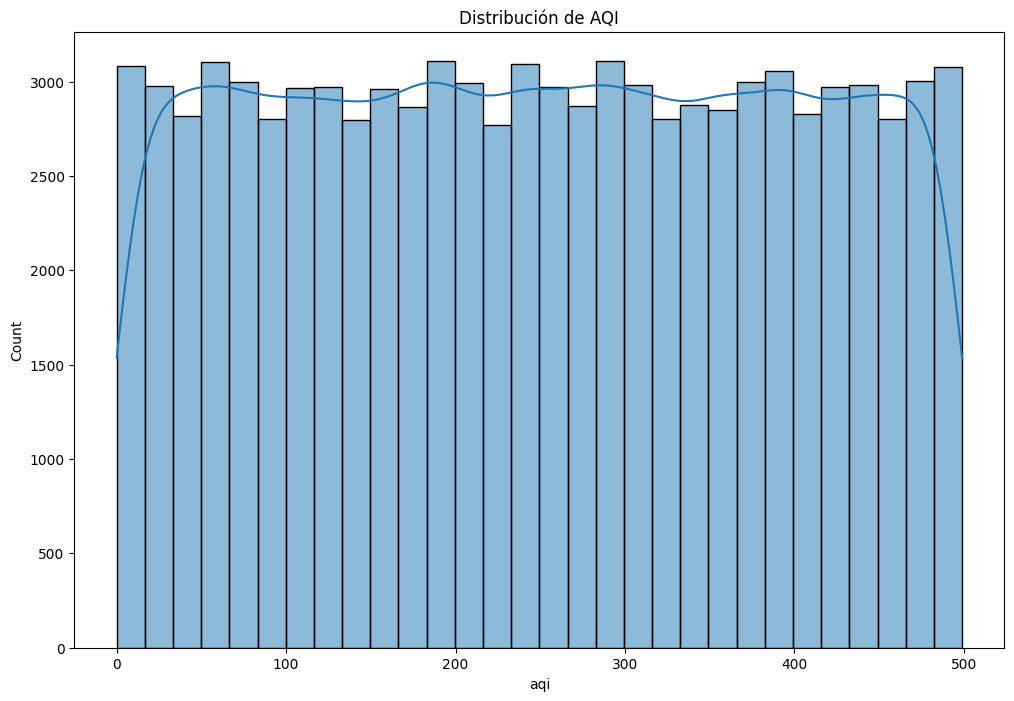

In [59]:
plt.figure(figsize=(12,8))
sns.histplot(df['aqi'], kde=True, bins=30)
plt.title('Distribución de AQI')
plt.show()

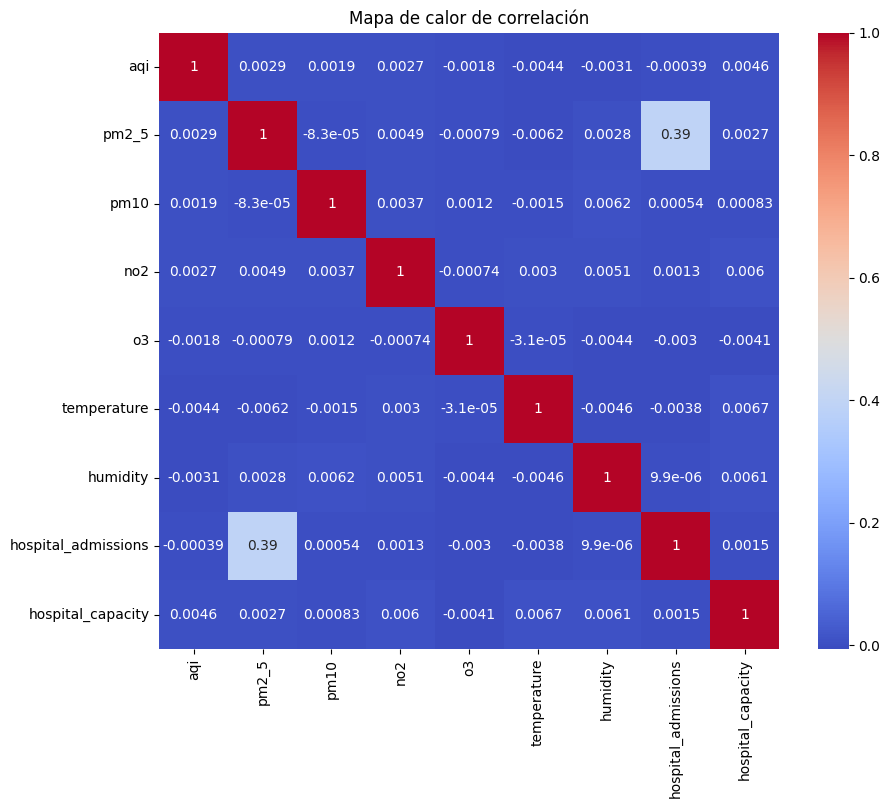

In [60]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

**Gráfico distribución de admisiones hospitalarias por ciudad**

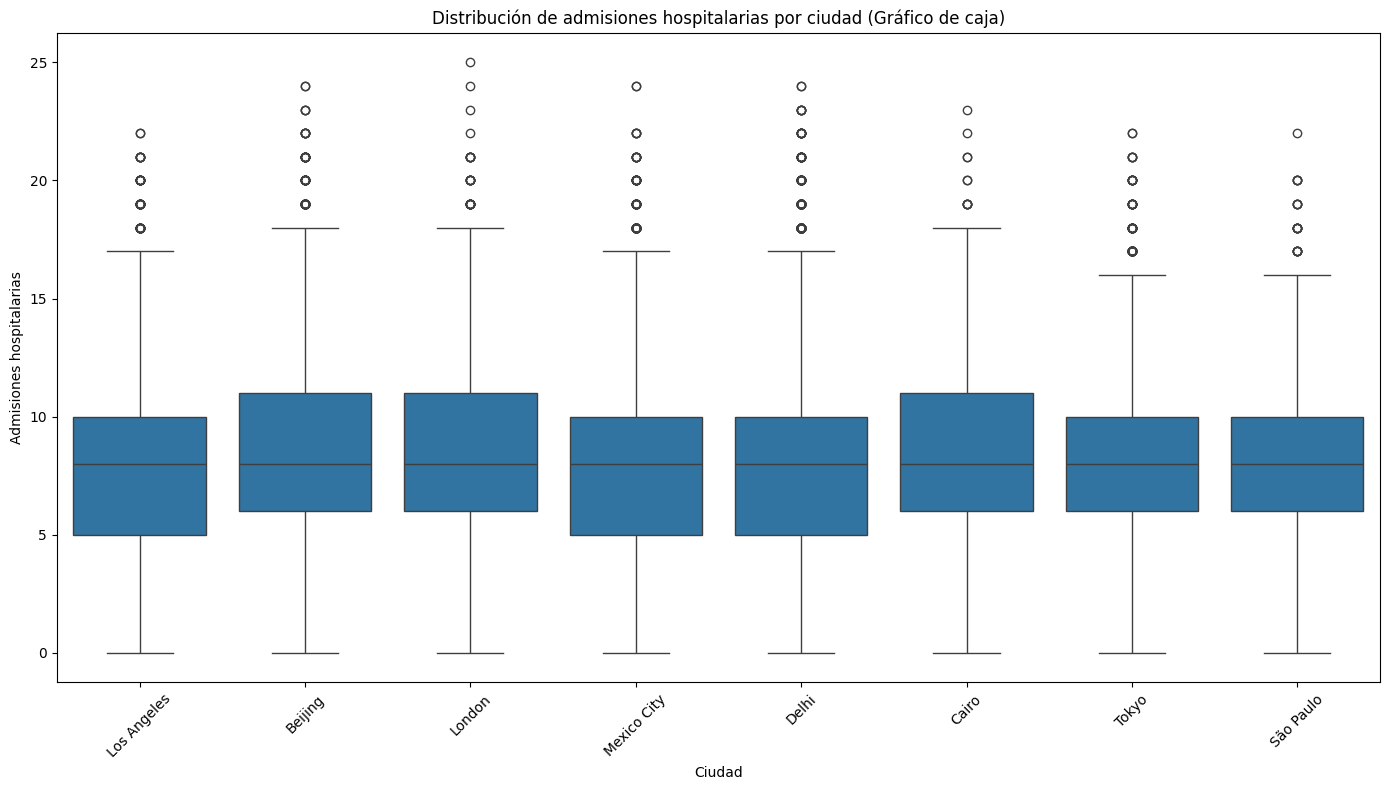

In [61]:
# Agrupamos por ciudad y fecha
df_grouped = df.groupby(['city', 'date'])['hospital_admissions'].sum().reset_index()

# Ajustes visuales
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='city', y='hospital_admissions')
plt.xticks(rotation=45)
plt.title('Distribución de admisiones hospitalarias por ciudad (Gráfico de caja)')
plt.xlabel('Ciudad')
plt.ylabel('Admisiones hospitalarias')
plt.tight_layout()
plt.show()

In [62]:
path_expor = 'C:\\Users\\gvald\\Desktop\\Proyecto2\\selected_dataset\\dataset_select.csv'
df.to_csv(path_expor)